In [4]:
from pyhht import EMD
import numpy as np
import pyleoclim as pyleo
import matplotlib.pyplot as plt
%matplotlib inline
from pyleoclim.utils import spectral

In [11]:
from pyleoclim import tsutils

# In this notebook we use Savitzky-Golay for detrending the generated synthetic signals and compare it's performance with emd and new emd(removing nodes that are asymptotes)

# Detrending using Savitzky-Golay

In [24]:
import warnings


In [25]:
warnings.filterwarnings('ignore')

In [26]:
plt.figure(figsize=(20,12))

<Figure size 1440x864 with 0 Axes>

<Figure size 1440x864 with 0 Axes>

In [85]:
def strictly_decreasing(L):
    '''
    method to check if the values in the given array is nearly decreasing 
    '''
    n = len(L)
    s=list(x>=y for x, y in zip(L, L[1:]))
    a = list(filter(lambda x:x!=False,s))
    if n-len(a)<=10:
        return True
    return False


In [105]:
def modified_emd(sig):
    '''
    takes a signal containing a trend as input and returns a detrended signal by decomposing the signal using emd 
    and removing modes that are asymptotes, to look at the modes when can uncomment the commented section
    '''
    a =EMD(sig).decompose()
    #plt.figure(figsize=(12,8))
    #plt.subplots(nrows=2,ncols=2)


    for b,i in enumerate(a):



        #plt.subplot(2,1,1)
        #plt.plot(i,label=b)
        res_dict = spectral.mtm(i,np.arange(len(i)))
        
        x = res_dict['psd']

        x = x[~np.isnan(x)]
        flag = strictly_decreasing(x)
        if flag:
            sig= sig - i
    return sig

# Linear trend

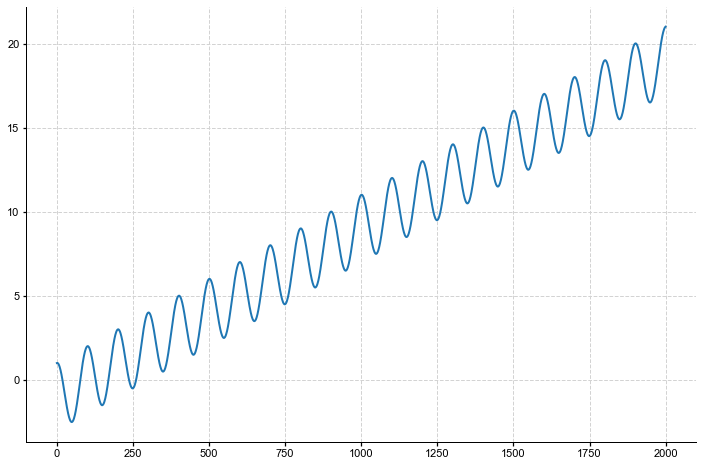

In [106]:
t = np.arange(2001)
f = 1/50
signal = 2*np.cos(np.pi*f*t)
slope = 0.01
intercept = -1
linear_trend = slope*t + intercept
signal_linear = signal+linear_trend
plt.figure(figsize=(12,8)) 
plt.plot(signal_linear)



# Detrending by removing the mode which contains asymptote

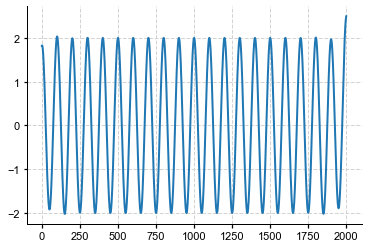

In [107]:
plt.plot(modified_emd(signal_linear))

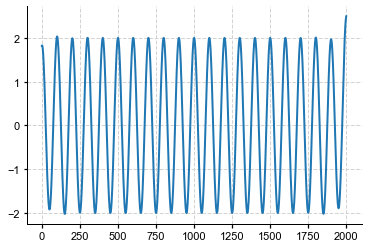

In [104]:
plt.plot(tsutils.detrend(signal_linear,t,method='emd'))

# Detrending using Savitzky-Golay

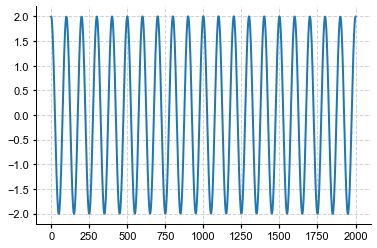

In [83]:
plt.plot(tsutils.detrend(signal,t,method='savitzky-golay'))

# Linear Trend for Signal with noise

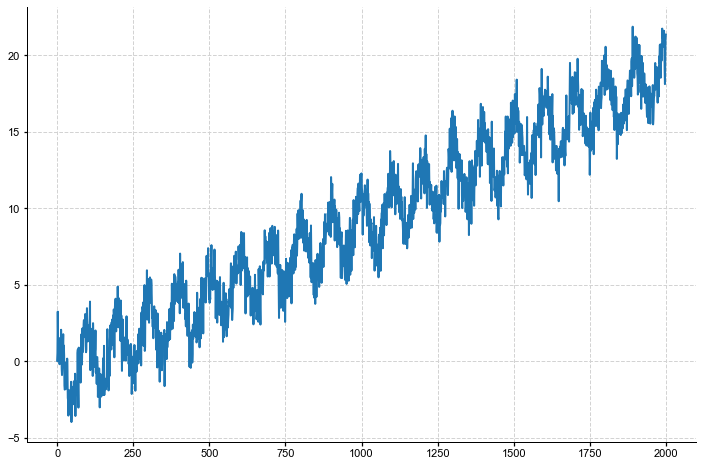

In [93]:
sig_var = np.var(signal)
noise_var = sig_var/ 2 #signal is twice the size of noise
white_noise = np.random.normal(0, np.sqrt(noise_var), size=np.size(signal))
slope = 0.01
intercept = -1
signal_noise = signal+white_noise
linear_trend = slope*t + intercept
signal_linear_noise = signal_noise+linear_trend
plt.figure(figsize=(12,8))
plt.plot(signal_linear_noise)

# Repeating the above detrending methods

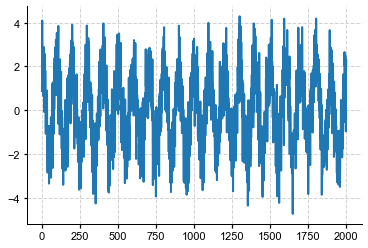

In [108]:
plt.plot(modified_emd(signal_linear_noise))

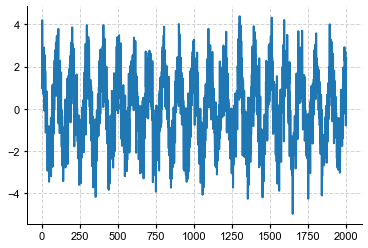

In [96]:
plt.plot(tsutils.detrend(signal_linear_noise,t,method='savitzky-golay'))

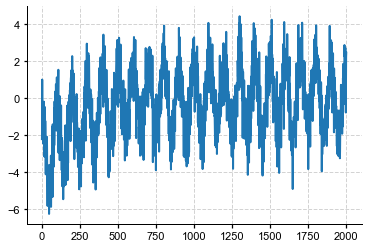

In [97]:
plt.plot(tsutils.detrend(signal_linear_noise,t,method='emd'))

# Non Linear Trend

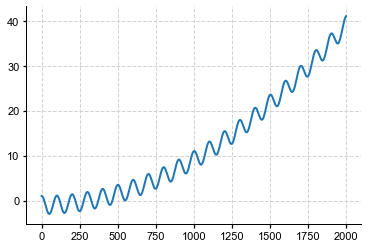

In [109]:
slope = 1e-5
intercept = -1
non_linear_trend = slope*t**2 + intercept
signal_non_linear = signal+non_linear_trend
plt.plot(signal_non_linear)


# Detrending using the same methods

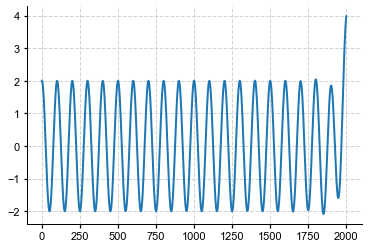

In [110]:
plt.plot(modified_emd(signal_non_linear))

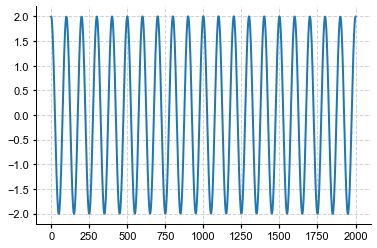

In [111]:
plt.plot(tsutils.detrend(signal_non_linear,t,method='savitzky-golay'))

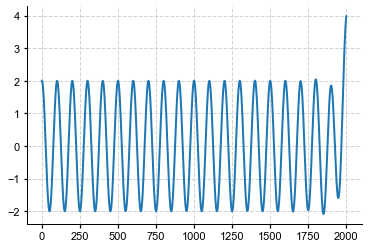

In [35]:
plt.plot(tsutils.detrend(signal_non_linear,t,method='emd'))

# Plotting Detrended Signal

# Non Linear Trend for Noisy Signal

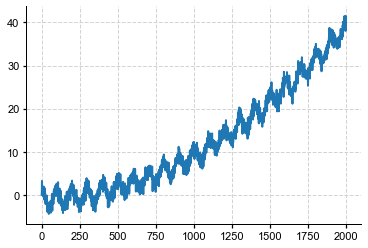

In [112]:
signal_non_linear_noisy_trend = signal_noise+non_linear_trend

plt.plot(signal_non_linear_noisy_trend)


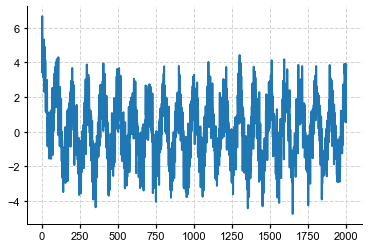

In [113]:
plt.plot(modified_emd(signal_non_linear_noisy_trend))

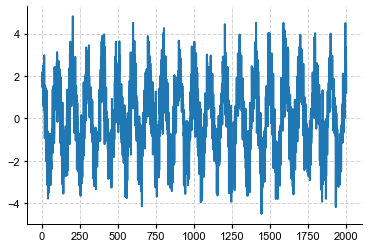

In [38]:
plt.plot(tsutils.detrend(signal_non_linear_noisy_trend,t,method='savitzky-golay'))

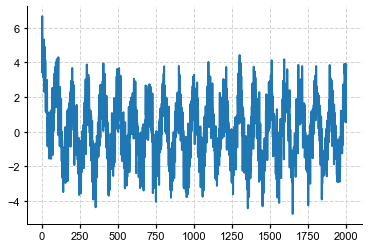

In [114]:
plt.plot(tsutils.detrend(signal_non_linear_noisy_trend,t,method='emd'))

# Cosine Trend

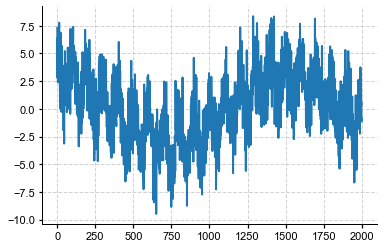

In [115]:
freq = 1/1500
signal2 = np.cos(2*np.pi*freq*t)
signal_cos = signal+3*signal2
sig_var = np.var(signal_cos)
noise_var = sig_var/ 2 #signal is twice the size of noise
white_noise = np.random.normal(0, np.sqrt(noise_var), size=np.size(signal_cos))
signal_cos = signal_cos+white_noise
plt.plot(signal_cos)


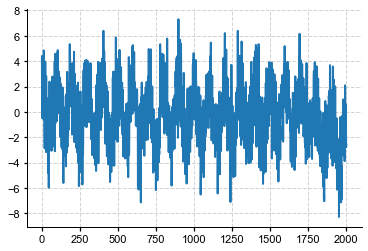

In [116]:
plt.plot(modified_emd(signal_cos))

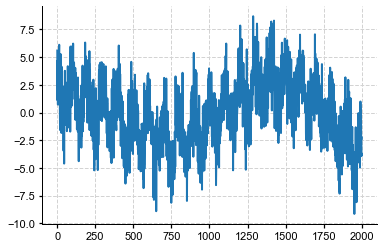

In [117]:
plt.plot(tsutils.detrend(signal_cos,t,method='savitzky-golay'))

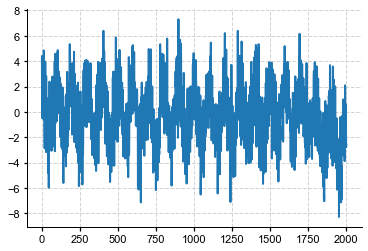

In [118]:
plt.plot(tsutils.detrend(signal_cos,t,method='emd'))

# S Shaped Trend

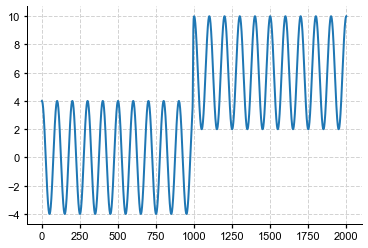

In [119]:
Y = 6*t / ( t+ np.exp(1000-1*t)) 
#plt.plot(Y)
signal_s = signal+Y

signal_s = signal+signal_s

plt.plot(signal_s)
    
    



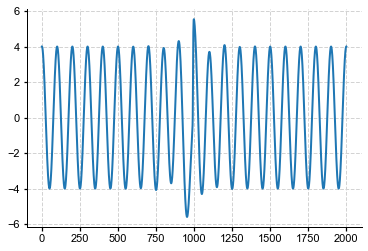

In [120]:
plt.plot(modified_emd(signal_s))

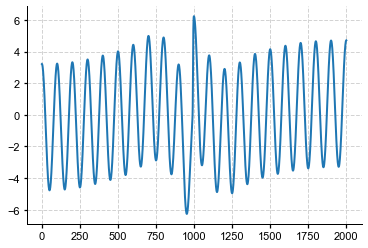

In [121]:
plt.plot(tsutils.detrend(signal_s,method='emd'))

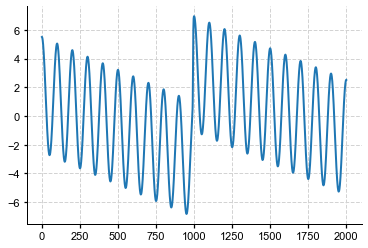

In [122]:
plt.plot(tsutils.detrend(signal_s,t,method='savitzky-golay'))

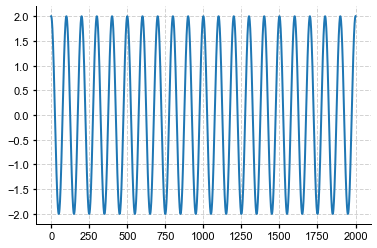

In [79]:
plt.plot(signal)

# From the experiments performed above we can observe that savitzky-golay does a better job of detrending in comparison to emd when the signals have a linear and non linear trend, whereas for signals that have a cosine trend or s-shaped trend emd and modified emd seem to do better job in detrending